In [70]:
import cobra
import matplotlib.pylab as plt
import numpy as np

In [71]:
mod1 = cobra.io.load_json_model('./cerevisiaeMod1.json')
mod1a = cobra.io.load_json_model('./cerevisiaeMod1a.json')
mod2 = cobra.io.load_json_model('./cerevisiaeMod2.json')
mod3 = cobra.io.load_json_model('./cerevisiaeMod3.json')

In [72]:
mod1accoa = cobra.io.load_json_model('./cerevisiaeMod1accoa.json')
mod1aAccoa = cobra.io.load_json_model('./cerevisiaeMod1aAccoa.json')
mod2accoa = cobra.io.load_json_model('./cerevisiaeMod2accoa.json')
mod3accoa = cobra.io.load_json_model('./cerevisiaeMod3accoa.json')

In [73]:
print('mod1:', len(mod1.reactions), 'mod1a:', len(mod1a.reactions), 
      'mod2:', len(mod2.reactions), 'mod3:', len(mod3.reactions))

mod1: 1583 mod1a: 1583 mod2: 1583 mod3: 1584


In [74]:
print('mod1 +:', len(mod1accoa.reactions), 'mod1a +:', len(mod1aAccoa.reactions), 
      'mod2 +:', len(mod2accoa.reactions), 'mod3 +:', len(mod3accoa.reactions))

mod1 +: 1585 mod1a +: 1585 mod2 +: 1585 mod3 +: 1586


## New reactions:

The objective is to analize the effect of adding the following two reactions: 


- ME2: $ atp_c + cit_c + coa_c → accoa_c + adp_c + oaa_c + pi_c $
- ACITL: $ mal_{L_c} + nadp_c \leftrightarrow co2_c + nadph_c + pyr_c$

for

$$
\begin{equation*}
\begin{aligned}
& \underset{f}{\text{maximize}}
& &  f_{biomass} +  \lambda \ f_{but} \\
& \text{subject to}
& & Sf = 0 \\
&&& l_i \leq f_i \leq u_i, \; i = 1, \ldots, m.
\end{aligned}
\end{equation*}
$$

In [77]:
def solPath(lams, model, biomass, but):
    
    modelCopy = model.copy()
    
    nlams = len(lams)

    buts = np.repeat(0.0, nlams)
    biomasses = np.repeat(0.0, nlams)


    for i, lam in enumerate(lams):

        biomass_but = modelCopy.problem.Objective(biomass + lam*but, direction='max')

        modelCopy.objective = biomass_but

        solution = modelCopy.optimize(objective_sense=None)

        buts[i] = solution.fluxes.DM_but_c

        biomasses[i] = solution.fluxes.BIOMASS_SC5_notrace  
        
    return({'buts' : buts, 'biomasses' : biomasses})
    

In [76]:
lams = np.arange(0, 0.07, 0.001)

In [78]:
biomass = mod1.reactions.BIOMASS_SC5_notrace.flux_expression
but = mod1.reactions.DM_but_c.flux_expression
pathMod1= solPath(lams, mod1, biomass, but)

In [79]:
biomass = mod1accoa.reactions.BIOMASS_SC5_notrace.flux_expression
but = mod1accoa.reactions.DM_but_c.flux_expression
pathMod1Plus= solPath(lams, mod1accoa, biomass, but)

In [80]:
biomass = mod1a.reactions.BIOMASS_SC5_notrace.flux_expression
but = mod1a.reactions.DM_but_c.flux_expression
pathMod1a= solPath(lams, mod1a, biomass, but)

In [81]:
biomass = mod1aAccoa.reactions.BIOMASS_SC5_notrace.flux_expression
but = mod1aAccoa.reactions.DM_but_c.flux_expression
pathMod1aPlus= solPath(lams, mod1aAccoa, biomass, but)

In [243]:
biomass = mod2.reactions.BIOMASS_SC5_notrace.flux_expression
but = mod2.reactions.DM_but_c.flux_expression
pathMod2= solPath(lams, mod2, biomass, but)

In [83]:
biomass = mod2accoa.reactions.BIOMASS_SC5_notrace.flux_expression
but = mod2accoa.reactions.DM_but_c.flux_expression
pathMod2Plus= solPath(lams, mod2accoa, biomass, but)

In [84]:
biomass = mod3.reactions.BIOMASS_SC5_notrace.flux_expression
but = mod3.reactions.DM_but_c.flux_expression
pathMod3= solPath(lams, mod3, biomass, but)

In [96]:
biomass = mod3accoa.reactions.BIOMASS_SC5_notrace.flux_expression
but = mod3accoa.reactions.DM_but_c.flux_expression
pathMod3Plus= solPath(lams, mod3accoa, biomass, but)

### Some plots

Slight improvement in biomass and butyrate production. 

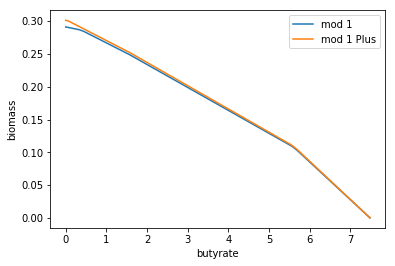

In [104]:
plt.plot(pathMod1['buts'], pathMod1['biomasses'], label = 'mod 1')
plt.plot(pathMod1Plus['buts'], pathMod1Plus['biomasses'], label = 'mod 1 Plus')
plt.legend()
plt.ylabel('biomass')
plt.xlabel('butyrate')
plt.show()

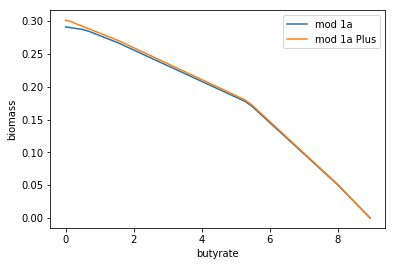

In [103]:
plt.plot(pathMod1a['buts'], pathMod1a['biomasses'], label = 'mod 1a')
plt.plot(pathMod1aPlus['buts'], pathMod1aPlus['biomasses'], label = 'mod 1a Plus')
plt.legend()
plt.ylabel('biomass')
plt.xlabel('butyrate')
plt.show()

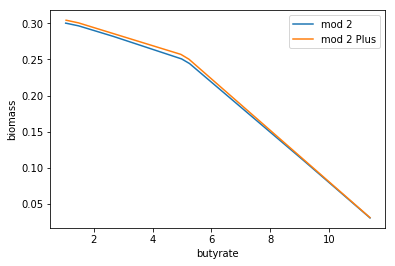

In [102]:
plt.plot(pathMod2['buts'], pathMod2['biomasses'], label = 'mod 2')
plt.plot(pathMod2Plus['buts'], pathMod2Plus['biomasses'], label = 'mod 2 Plus')
plt.legend()
plt.xlabel('butyrate')
plt.ylabel('biomass')
plt.show()

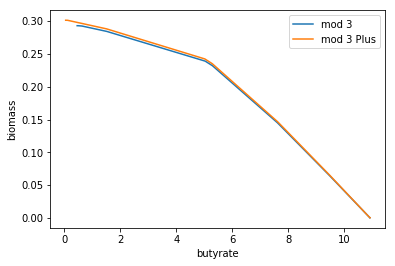

In [101]:
plt.plot(pathMod3['buts'], pathMod3['biomasses'], label = 'mod 3')
plt.plot(pathMod3Plus['buts'], pathMod3Plus['biomasses'], label = 'mod 3 Plus')
plt.legend()
plt.xlabel('butyrate')
plt.ylabel('biomass')
plt.show()

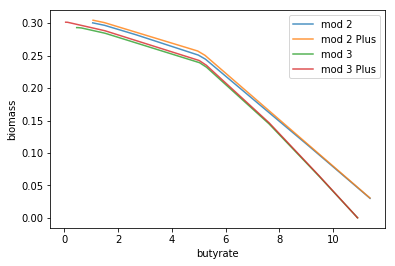

In [100]:
a = 0.8
plt.plot(pathMod2['buts'], pathMod2['biomasses'], label = 'mod 2', alpha = a)
plt.plot(pathMod2Plus['buts'], pathMod2Plus['biomasses'], label = 'mod 2 Plus', alpha = a)
plt.plot(pathMod3['buts'], pathMod3['biomasses'], label = 'mod 3', alpha = a)
plt.plot(pathMod3Plus['buts'], pathMod3Plus['biomasses'], label = 'mod 3 Plus', alpha = a)
plt.legend()
plt.xlabel('butyrate')
plt.ylabel('biomass')
plt.show()

### Overexpressing ACITL reaction

In [106]:
lam = 0.03
biomass = mod1accoa.reactions.BIOMASS_SC5_notrace.flux_expression
but = mod1accoa.reactions.DM_but_c.flux_expression

biomass_but = mod2accoa.problem.Objective(biomass + lam*but, direction='max')
mod2accoa.objective = biomass_but

In [107]:
mod2accoa.reactions.ACITL.lower_bound = 0
sol2aacoa = mod2accoa.optimize()
mod2accoa.summary()

IN FLUXES          OUT FLUXES     OBJECTIVES
-----------------  -------------  ----------------------
glc__D_e  10       h_e     19.5   BIOMASS_SC5_...  0.247
o2_e       2       h2o_e   13.6   DM_but_c         0.157
nh4_e      1.38    succ_e   6.49
pi_e       0.0488  but_c    5.25
so4_e      0.0191  co2_e    4.18


In [117]:
mod2accoaCopy = mod2accoa.copy()
mod2accoaCopy.reactions.ACITL.lower_bound = 2
sol2aacoa = mod2accoaCopy.optimize()
mod2accoaCopy.summary()

IN FLUXES          OUT FLUXES     OBJECTIVES
-----------------  -------------  ----------------------
glc__D_e  10       h_e     19.8   BIOMASS_SC5_...  0.219
o2_e       2       h2o_e   13.4   DM_but_c         0.16
nh4_e      1.23    succ_e   6.66
pi_e       0.0434  but_c    5.33
so4_e      0.017   co2_e    4.16


# Knockouts

| Id      |Gene	    |formula  | Reaction |
|:-------:|:-------:|:--------:|:--------:|
|YOR375C  |GDH1	|glu__L_c + h2o_c + nadp_c <=> akg_c + h_c + nadph_c + nh4_c	|GLUDy
|YNL117W  |MLS1	|accoa_c + glx_c + h2o_c <=> coa_c + h_c + mal__L_c	            |MALS
|YNL037C  |IDH1	|icit_m + nad_m <=> akg_m + co2_m + nadh_m	                    |ICDHxm
|YOR136W  |IDH2	|icit_m + nad_m <=> akg_m + co2_m + nadh_m	                    |ICDHxm


Remark: MLS1 is associated with reactions: {MALSp, MALS}

In [195]:
print("Genes")
print("-----")
print(" id   gene ")
for x in mod2.genes:
    associated_ids = (i.id for i in x.reactions)
    print(x.id, "%s is associated with reactions: %s" %
          (x.name,  "{" + ", ".join(associated_ids) + "}"))

Genes
-----
 id   gene 
Q0045 COX1 is associated with reactions: {CYOOm}
Q0080 ATP8 is associated with reactions: {ATPS3m}
Q0085 ATP6 is associated with reactions: {ATPS3m}
Q0105 COB is associated with reactions: {CYOR_u6m}
Q0130 OLI1 is associated with reactions: {ATPS3m}
Q0250 COX2 is associated with reactions: {CYOOm}
Q0275 COX3 is associated with reactions: {CYOOm}
Ter Ter is associated with reactions: {ACOAD1b}
UNKNOWN  is associated with reactions: {AGAT_SC, CITtam}
YAL012W CYS3 is associated with reactions: {CYSTGL}
YAL022C FUN26 is associated with reactions: {ADNt2, CYTDt2, URIt2}
YAL023C PMT2 is associated with reactions: {DOLPMMer}
YAL038W CDC19 is associated with reactions: {PYK}
YAL044C GCV3 is associated with reactions: {GLYCLm, GCCcm, GCC2am, GCC2bim, GCC2cm_copy1, GCCam, THFATm, GCCbim}
YAL054C ACS1 is associated with reactions: {ACSm, ACSp}
YAL060W BDH1 is associated with reactions: {BTDD_RR}
YAL062W GDH3 is associated with reactions: {GLUDy}
YAR015W ADE1 is associated 

In [228]:
def knockOuts(model, geneList):
    
    modelCopy = model.copy()
    
    for i, g in enumerate(geneList):
        gKO = modelCopy.genes.get_by_id(g)
        gKO.knock_out()
        for r in list(gKO.reactions):
            r.lower_bound = 0.
            r.upper_bound = 0.
        
    return(modelCopy)
    

In [255]:
fourGenes = ['YOR375C', 'YNL117W', 'YNL037C', 'YOR136W']

mod1FourKO = knockOuts(mod1, fourGenes)
mod1AccoFourKO = knockOuts(mod1accoa, fourGenes)

mod1aFourKO = knockOuts(mod1a, fourGenes)
mod1aAccoFourKO = knockOuts(mod1aAccoa, fourGenes)


mod2FourKO = knockOuts(mod2, fourGenes)
mod2AccoFourKO = knockOuts(mod2accoa, fourGenes)


mod3FourKO = knockOuts(mod3, fourGenes)
mod3AccoFourKO = knockOuts(mod3accoa, fourGenes)

In [241]:
mod2FourKO.genes.YOR136W

Gene identifier,YOR136W
Name,IDH2
Memory address,0x058fdbd3fd0
Functional,False
In 1 reaction(s),ICDHxm


In [242]:
mod2FourKO.reactions.ICDHxm

Reaction identifier,ICDHxm
Name,Isocitrate dehydrogenase NAD
Memory address,0x0589add3e10
Stoichiometry,icit_m + nad_m --> akg_m + co2_m + nadh_m Isocitrate + Nicotinamide adenine dinucleotide --> 2-Oxoglutarate + CO2 CO2 + Nicotinamide adenine dinucleotide - reduced
GPR,YNL037C and YOR136W
Lower bound,0.0
Upper bound,0.0


In [252]:
biomass = mod1FourKO.reactions.BIOMASS_SC5_notrace.flux_expression
but = mod1FourKO.reactions.DM_but_c.flux_expression
pathMod1FourKO = solPath(lams, mod1FourKO, biomass, but)

In [256]:
biomass = mod1AccoFourKO.reactions.BIOMASS_SC5_notrace.flux_expression
but = mod1AccoFourKO.reactions.DM_but_c.flux_expression
pathMod1AccoaFourKO = solPath(lams, mod1AccoFourKO, biomass, but)

In [259]:
biomass = mod2FourKO.reactions.BIOMASS_SC5_notrace.flux_expression
but = mod2FourKO.reactions.DM_but_c.flux_expression
pathMod2FourKO = solPath(lams, mod2FourKO, biomass, but)

In [279]:
biomass = mod2AccoFourKO.reactions.BIOMASS_SC5_notrace.flux_expression
but = mod2AccoFourKO.reactions.DM_but_c.flux_expression
pathMod2AccoaFourKO = solPath(lams, mod2AccoFourKO, biomass, but)

In [280]:
biomass = mod3FourKO.reactions.BIOMASS_SC5_notrace.flux_expression
but = mod3FourKO.reactions.DM_but_c.flux_expression
pathMod3FourKO = solPath(lams, mod3FourKO, biomass, but)

In [281]:
biomass = mod3AccoFourKO.reactions.BIOMASS_SC5_notrace.flux_expression
but = mod3AccoFourKO.reactions.DM_but_c.flux_expression
pathMod3AccoaFourKO = solPath(lams, mod3AccoFourKO, biomass, but)

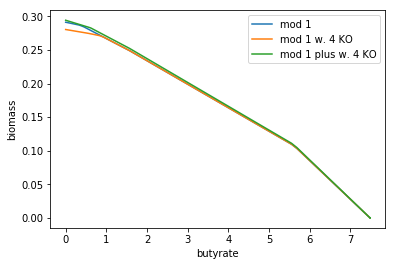

In [258]:
plt.plot(pathMod1['buts'], pathMod1['biomasses'], label = 'mod 1')
plt.plot(pathMod1FourKO['buts'], pathMod1FourKO['biomasses'], label = 'mod 1 w. 4 KO')
plt.plot(pathMod1AccoaFourKO['buts'], pathMod1AccoaFourKO['biomasses'], label = 'mod 1 plus w. 4 KO')
plt.legend()
plt.xlabel('butyrate')
plt.ylabel('biomass')
plt.show()

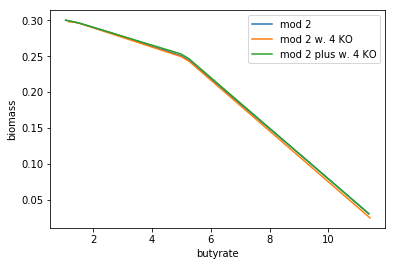

In [276]:
plt.plot(pathMod2['buts'], pathMod2['biomasses'], label = 'mod 2')
plt.plot(pathMod2FourKO['buts'], pathMod2FourKO['biomasses'], label = 'mod 2 w. 4 KO')
plt.plot(pathMod2AccoaFourKO['buts'], pathMod2AccoaFourKO['biomasses'], label = 'mod 2 plus w. 4 KO')
plt.legend()
plt.xlabel('butyrate')
plt.ylabel('biomass')
plt.show()

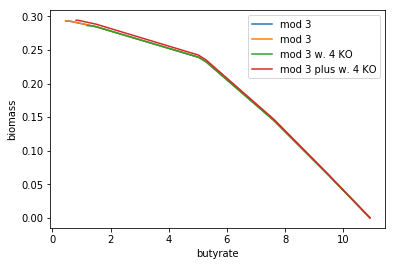

In [282]:
plt.plot(pathMod3['buts'], pathMod3['biomasses'], label = 'mod 3')
plt.plot(pathMod3FourKO['buts'], pathMod3FourKO['biomasses'], label = 'mod 3 w. 4 KO')
plt.plot(pathMod3AccoaFourKO['buts'], pathMod3AccoaFourKO['biomasses'], label = 'mod 3 plus w. 4 KO')
plt.legend()
plt.xlabel('butyrate')
plt.ylabel('biomass')
plt.show()

## Succinate reactions

In [270]:
mod2.metabolites.succ_c.summary()

PRODUCING REACTIONS -- Succinate (succ_c)
-----------------------------------------
%       FLUX  RXN ID    REACTION
----  ------  --------  -------------------------------------
100%  6.79    FRDcm     fadh2_m + fum_c --> fad_m + succ_c
0%    0.0277  DHORDfum  dhor__S_c + fum_c --> orot_c + succ_c

CONSUMING REACTIONS -- Succinate (succ_c)
-----------------------------------------
%       FLUX  RXN ID    REACTION
----  ------  --------  -------------------------------------
100%  6.82    SUCCt2r   h_e + succ_e <=> h_c + succ_c


In [266]:
mod2.reactions.FRDcm

Reaction identifier,FRDcm
Name,Fumarate reductase cytosolicmitochondrial
Memory address,0x058fed01f98
Stoichiometry,fadh2_m + fum_c --> fad_m + succ_c Flavin adenine dinucleotide reduced + Fumarate --> Flavin adenine dinucleotide oxidized + Succinate
GPR,YEL047C
Lower bound,0.0
Upper bound,999999.0


In [271]:
succGene = ['YEL047C']

mod2SuccKo = knockOuts(mod2, succGene)
mod2AccoSuccKO = knockOuts(mod2accoa, succGene)

In [272]:
biomass = mod2SuccKo.reactions.BIOMASS_SC5_notrace.flux_expression
but = mod2SuccKo.reactions.DM_but_c.flux_expression
pathMod2SuccKo = solPath(lams, mod2SuccKo, biomass, but)

In [273]:
biomass = mod2AccoSuccKO.reactions.BIOMASS_SC5_notrace.flux_expression
but = mod2AccoSuccKO.reactions.DM_but_c.flux_expression
pathMod2AccoSuccKO = solPath(lams, mod2AccoSuccKO, biomass, but)

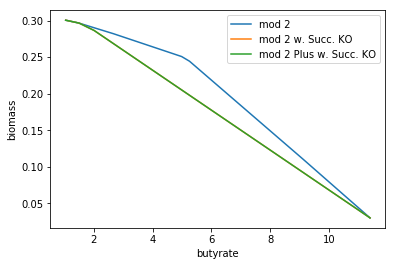

In [275]:
plt.plot(pathMod2['buts'], pathMod2['biomasses'], label = 'mod 2')
plt.plot(pathMod2SuccKo['buts'], pathMod2SuccKo['biomasses'], label = 'mod 2 w. Succ. KO')
plt.plot(pathMod2AccoSuccKO['buts'], pathMod2AccoSuccKO['biomasses'], label = 'mod 2 Plus w. Succ. KO')
plt.legend()
plt.xlabel('butyrate')
plt.ylabel('biomass')
plt.show()